In [2]:

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

sns.set(color_codes=True)
#from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("C:\\Users\\sayak\\OneDrive\\Desktop\\IMP\\Personal\\Projects\\Olympic Data Analyst\\Summer-Olympic-medals-1976-to-2008.csv", encoding="latin1")

In [39]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [40]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


In [41]:
#print(df.head())
#print(df.shape)
#print(df.index)
print(df_cleaned.columns)
print(df_cleaned.info())

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [42]:
print(df_cleaned.describe(include="all"))


           City          Year     Sport Discipline   Event          Athlete  \
count     15316  15316.000000     15316      15316   15316            15316   
unique        9           NaN        28         41     293            11337   
top     Beijing           NaN  Aquatics  Athletics  hockey  PHELPS, Michael   
freq       2042           NaN      2210       1523     817               16   
mean        NaN   1993.620789       NaN        NaN     NaN              NaN   
std         NaN     10.159851       NaN        NaN     NaN              NaN   
min         NaN   1976.000000       NaN        NaN     NaN              NaN   
25%         NaN   1984.000000       NaN        NaN     NaN              NaN   
50%         NaN   1996.000000       NaN        NaN     NaN              NaN   
75%         NaN   2004.000000       NaN        NaN     NaN              NaN   
max         NaN   2008.000000       NaN        NaN     NaN              NaN   

       Gender Country_Code        Country Event_gen

<Figure size 1000x500 with 0 Axes>

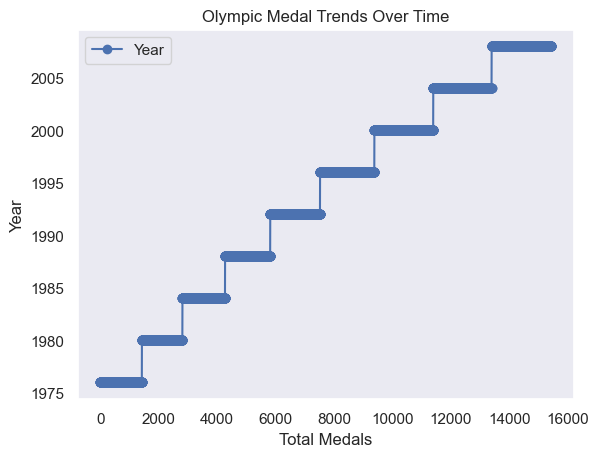

In [43]:
plt.figure(figsize=(10,5))
df.plot(kind="line", marker="o", color="b", linestyle="-")
plt.xlabel("Total Medals")
plt.ylabel("Year")
plt.title("Olympic Medal Trends Over Time")
plt.grid()
plt.show()

In [44]:
# Count medals by country
top_countries = df_cleaned.groupby("Country")["Medal"].count().sort_values(ascending=False)

# Display top 5 countries
print( top_countries.head(10))


Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: Medal, dtype: int64


In [45]:
# Count medals by athlete
top_athletes = df_cleaned.groupby(["Country","Athlete"])["Medal"].count().sort_values(ascending=False)

# Display top 5 athletes
print(top_athletes.head(20))

Country        Athlete               
United States  PHELPS, Michael           16
               TORRES, Dara              12
Soviet Union   ANDRIANOV, Nikolay        12
Russia         NEMOV, Alexei             12
United States  THOMPSON, Jenny           12
               COUGHLIN, Natalie         11
               BIONDI, Matthew           11
               LEWIS, Carl               10
Germany        VAN ALMSICK, Franziska    10
Soviet Union   DITYATIN, Aleksandr       10
United States  HALL, Gary Jr.            10
Jamaica        OTTEY-PAGE, Merlene        9
Romania        COMANECI, Nadia            9
Australia      THORPE, Ian                9
               O'NEILL, Susan             8
Germany        FISCHER, Birgit            8
               WERTH, Isabell             8
Romania        LIPA, Elisabeta            8
Australia      JONES, Leisel              8
Italy          TRILLINI, Giovanna         8
Name: Medal, dtype: int64


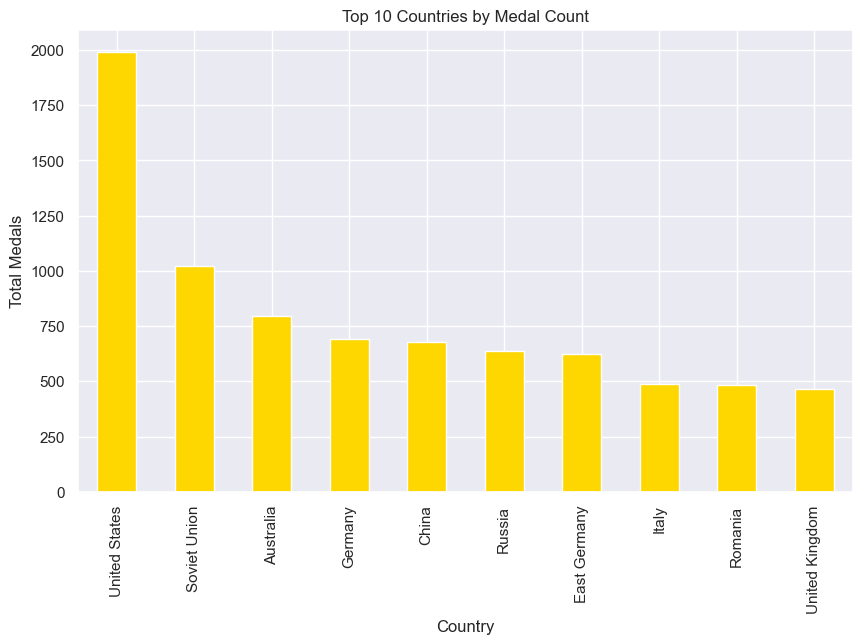

In [46]:
plt.figure(figsize=(10, 6))
top_countries.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

In [47]:
medals_over_years = df_cleaned.groupby('Year')['Medal'].count().sort_values(ascending=False)
print(medals_over_years)

Year
2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1387
1976.0    1305
Name: Medal, dtype: int64


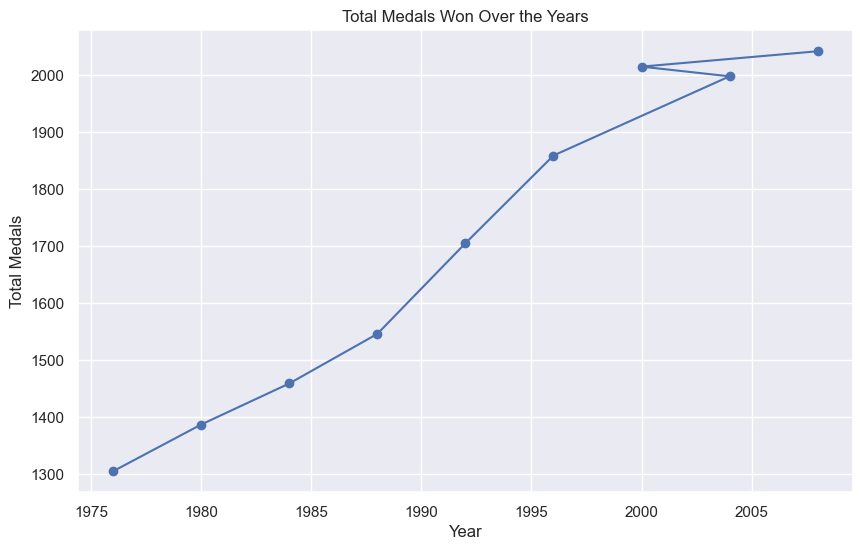

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values, marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

In [49]:
 # Group by Athlete and count the number of medals
athlete_medal_count=df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
print(athlete_medal_count)

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
TORRES, Dara           12
THOMPSON, Jenny        12
ANDRIANOV, Nikolay     12
                       ..
ZVYAGINTSEV, Viktor     1
ZWEHL, Julia            1
ZWERING, Klaas-Erik     1
ZUEVA, Natalia          1
ZUIJDWEG, Martijn       1
Name: Medal, Length: 11337, dtype: int64


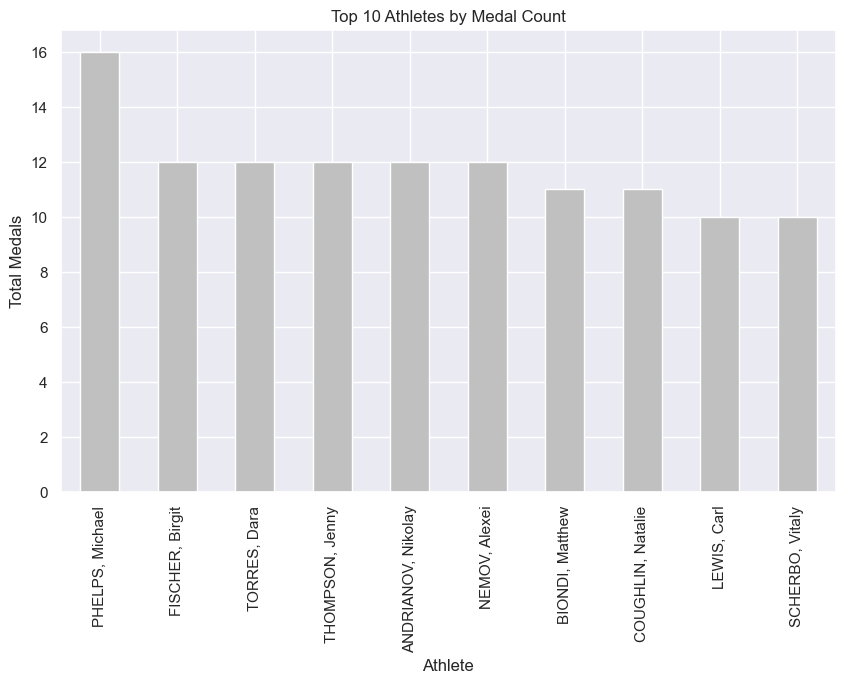

In [50]:
 # Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

**Analysing Data**

Q1.Which city hosted maximum number of olympics:

In [89]:
q1_data=df_cleaned[["City",'Year']]
q1_data=q1_data.drop_duplicates('Year')
print(q1_data)

              City    Year
0         Montreal  1976.0
1422        Moscow  1980.0
2809   Los Angeles  1984.0
4268         Seoul  1988.0
5814     Barcelona  1992.0
7519       Atlanta  1996.0
9378        Sydney  2000.0
11393       Athens  2004.0
13391      Beijing  2008.0


So It seems like, since 1976 no city has hosted Olympics twice.

 Q2.Which city hosted most events?

<Axes: xlabel='City'>

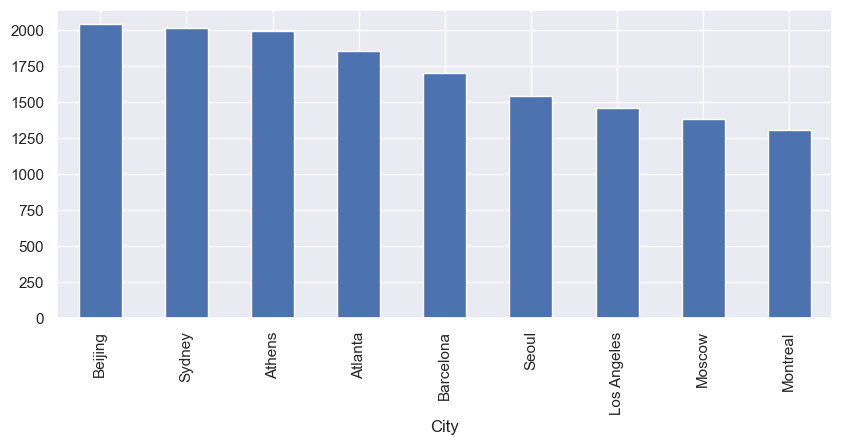

In [91]:
q2_data=df_cleaned['City'].value_counts()
q2_data.columns=['City','Count']
plt.figure(figsize=(10,4))
q2_data.plot.bar(x = 'City', y = 'Count') # q2_data.plot(kind ='bar', x= 'City', y = 'Count')

Beijing has the hosted the biggest Olympics since 1976 till 2008. Followed by Sydney and Athens.

 Q3. Understand the events themselves.

In [96]:
q3_data=df_cleaned[['Sport','Discipline','Event']].drop_duplicates()
print("Total number of unique events are helds of a rare:",len(q3_data))
q3_data

Total number of unique events are helds of a rare: 334


,Sport,Discipline,Event
0,0,Diving,3m springboard
4,0,Diving,10m platform
12,0,Swimming,4x100m freestyle relay
13,0,Swimming,400m freestyle
15,0,Swimming,1500m freestyle
...,...,...,...
15016,18,Sailing,Laser Radial - One Person Dinghy
15020,18,Sailing,Finn - Heavyweight Dinghy
15026,18,Sailing,Laser - One Person Dinghy
15029,18,Sailing,RS:X - Windsurfer


<Axes: xlabel='Sport'>

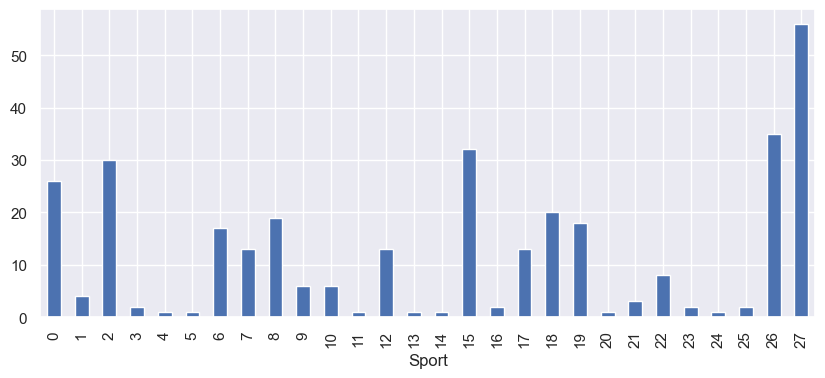

In [97]:
q3_data = q3_data.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (10,4))
q3_data.plot.bar(x = 'Sport', y = 'Count')

Ans. Sports with most events are Wrestling, Weightlifting and Judo. Total number of unique events are held: 334

 Q4. Which Athlete has win most medal from given period?

In [99]:
q4_data=df_cleaned.groupby(['Athlete'])['Athlete'].count().reset_index(name='Count').sort_values(ascending=False,by=['Count'])
q4_data=q4_data[:10]

<Axes: xlabel='Athlete'>

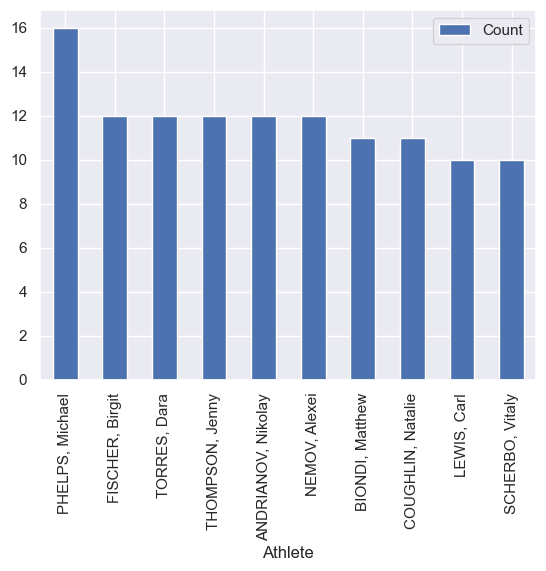

In [101]:
q4_data.plot.bar(x='Athlete',y='Count')

So Michael Phelps won 16 mdeal durin 1976 to 2008. Clearly mindblowing record !!

 Q5. Put some light on gender ratio in winning teams?

<Axes: ylabel='Gender'>

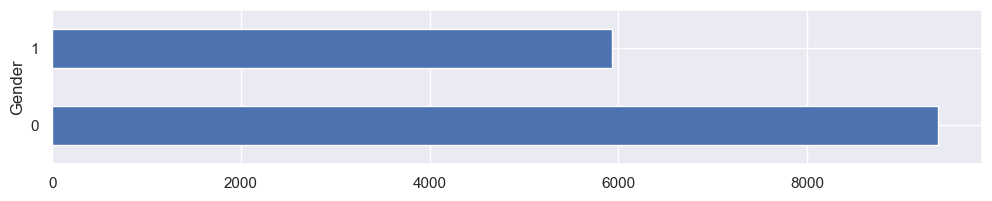

In [103]:
q5_data = df_cleaned.groupby(['Gender'])['Gender'].count()
plt.figure(figsize = (12,2))
q5_data.plot.barh(x = 'Athlete', y = 'Count')

It seems that there are some events which are made only for male.

In [104]:
q5_data = df_cleaned[['Event', 'Gender']]
q5_data = q5_data.groupby(['Event','Gender'])['Gender'].count()
q5_data

Event                               Gender
+ 100kg (heavyweight)               0          16
+ 100kg (super heavyweight)         0          18
+ 105kg                             0           9
+ 108kg, total (super heavyweight)  0           3
+ 110kg, total (super heavyweight)  0          15
                                             ... 
water polo                          1         117
épée individual                     0          27
                                    1          12
épée team                           0         114
                                    1          30
Name: Gender, Length: 379, dtype: int64

So there is a huge difference in number of male winners and female winners implying number of sporting event for male are way more than for female

Q6. Can you tell me which country has dominated any particular sport?

In [ ]:
q6_data = df.groupby(['Sport','Country'])['Country'].count().reset_index(name ='Count').sort_values(ascending = [True, False],by =['Sport','Count'])
q6_data.Sport.unique()

array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

Q7. Has any athlete changed his or her Event or Discipline or sport and still win the medal?

In [125]:
temp = df_cleaned[['Athlete','Sport']].drop_duplicates()
temp = temp.groupby(['Athlete'])
for k,v in temp:
 if len(v['Sport'].tolist()) >1:
  print(k,v['Sport'].tolist())

('BELOVA, Irina',) [2, 12]
('CHEN, Jing',) [21, 25]
('DIMITROV, Stefan',) [25, 26]
('GAVRILOV, Yuri',) [11, 13]
('GONZALEZ, Raul',) [2, 13]
('KOLESNIKOV, Nikolai',) [2, 26]
('KOVACS, Istvan',) [27, 6]
('KOVALENKO, Alexandre',) [2, 0]
('KUZNETSOV, Mikhail',) [17, 7]
('KUZNETSOV, Nikolai',) [17, 8]
('LEE, Eun Kyung',) [1, 14]
('LI, Na',) [0, 10]
('LI, Ting',) [0, 23]
('OVCHINNIKOVA, Elena',) [25, 0]
('ROMERO, Rebecca',) [17, 8]
('THOMPSON, Richard',) [4, 2]
('TOMA, Sanda',) [17, 7]
('WANG, Liping',) [11, 2]
('WELLS, Matthew',) [14, 17]
('YANG, Wei',) [3, 12]
('YOUNG, Tim',) [17, 4]


So there has been quite a few player who has changed the sport and still won a medal. Kudos to them !!

**Preprocessing for Machine Learning**

1. Import Libraries

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("C:\\Users\\sayak\\OneDrive\\Desktop\\IMP\\Personal\\Projects\\Olympic Data Analyst\\Summer-Olympic-medals-1976-to-2008.csv", encoding="latin1")

# Clean and preprocess
df = df.dropna(subset=['Medal'])  # Keep only medal-winning rows

# Create medal count per country per year
medal_counts = df.groupby(['Year', 'Country']).size().reset_index(name='Medal_Count')

# Create lag features (e.g., previous medal counts)
medal_counts['Prev_Medals'] = medal_counts.groupby('Country')['Medal_Count'].shift(1).fillna(0)

# Optional: Add host country flag
host_cities = df[['Year', 'City', 'Country']].drop_duplicates()
medal_counts = medal_counts.merge(host_cities, on='Year', how='left')
medal_counts['Is_Host'] = (medal_counts['Country_x'] == medal_counts['Country_y']).astype(int)
medal_counts = medal_counts.rename(columns={'Country_x': 'Country'}).drop(columns=['Country_y', 'City'])

# Train-test split
X = medal_counts[['Year', 'Prev_Medals', 'Is_Host']]
y = medal_counts['Medal_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


# Predict for next Olympics (e.g., 2012)
future = medal_counts[medal_counts['Year'] == 2008].copy()
future['Year'] = 2012
future['Prev_Medals'] = future['Medal_Count']
future['Is_Host'] = (future['Country'] == 'United Kingdom').astype(int)  # London 2012
future_pred = model.predict(future[['Year', 'Prev_Medals', 'Is_Host']])
future['Predicted_Medals'] = future_pred

# Top countries
top_countries = future.sort_values(by='Predicted_Medals', ascending=False).head(5)
print(top_countries[['Country', 'Predicted_Medals']])

RMSE: 18.861756898338204
             Country  Predicted_Medals
37154  United States             315.0
37153  United States             315.0
37140  United States             315.0
37139  United States             315.0
37138  United States             315.0
